In [1]:
# conda activate base
# conda install python-graphviz
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [2]:
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, test_size=0.2, random_state=2022
)

In [3]:
dtc = DecisionTreeClassifier(random_state=2022)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=2022)

- 모델 시각화

In [4]:
from sklearn.tree import export_graphviz
export_graphviz(
    dtc, out_file='tree.dot',
    feature_names=iris.feature_names, class_names=iris.target_names,
    impurity=True, filled=True
)

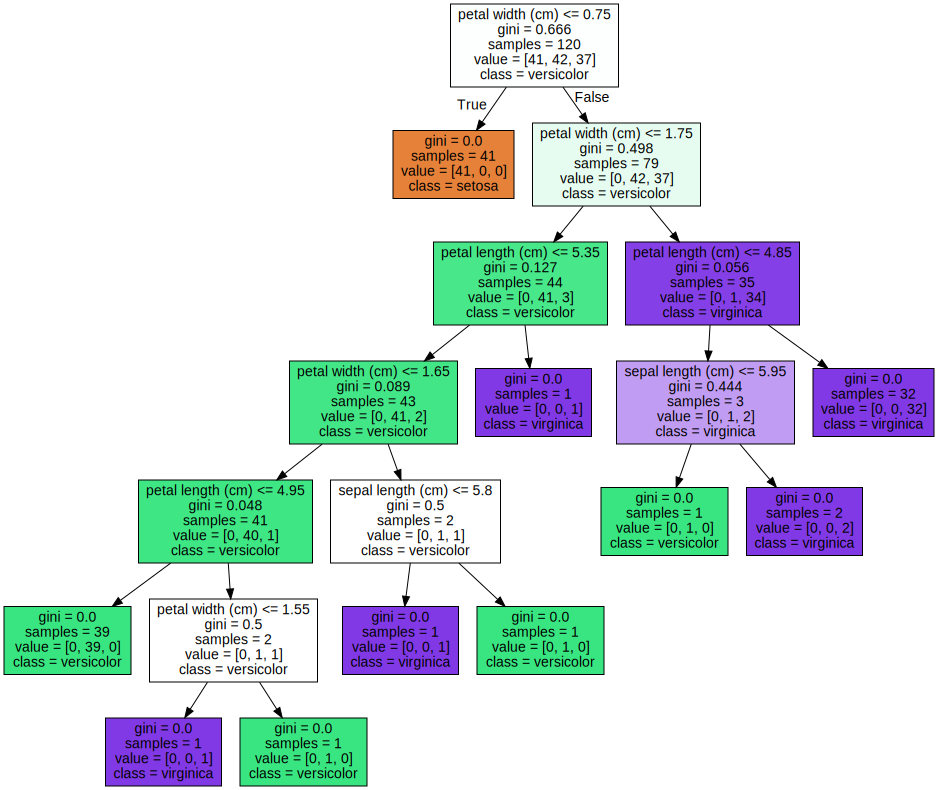

In [5]:
import graphviz

with open('tree.dot') as file:
    dot_graph = file.read()
graphviz.Source(dot_graph)

In [6]:
# graphviz.__version__
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

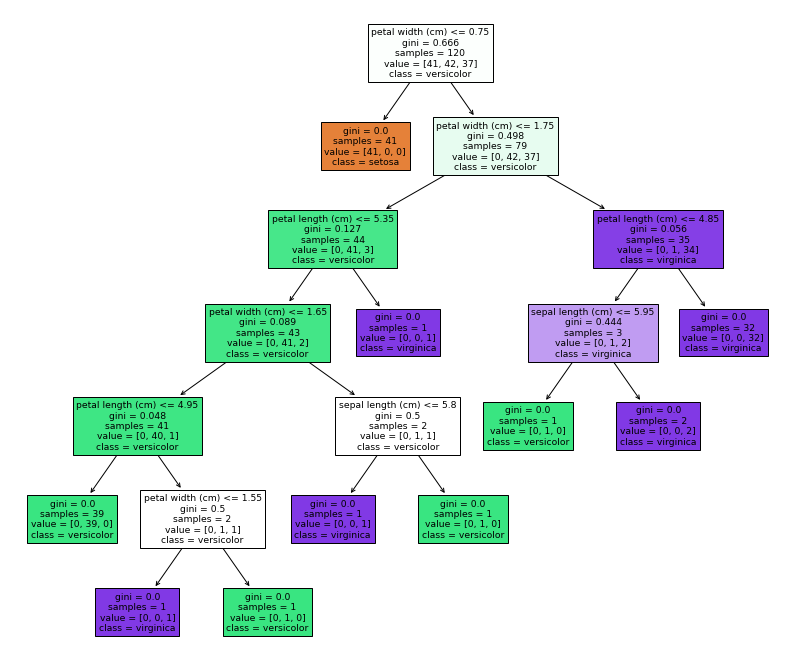

In [7]:
plt.figure(figsize=(14,12))
plot_tree(dtc, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.show()

#### 제약조건
- max_epth = 3

In [8]:
dtc2 = DecisionTreeClassifier(max_depth=3, random_state=156)
dtc2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=156)

In [11]:
dtc2 = DecisionTreeClassifier(max_depth=3, random_state=2022)
dtc2.fit(X_train, y_train)
export_graphviz(
    dtc2, out_file='tree2.dot',
    feature_names=iris.feature_names, class_names=iris.target_names,
    impurity=True, filled=True
)

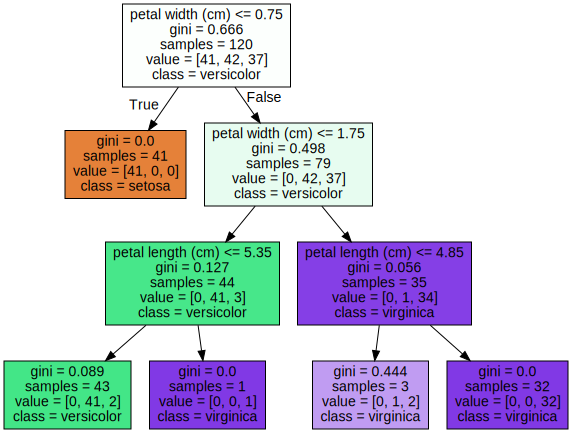

In [12]:
with open('tree2.dot') as file:
    dot_graph = file.read()
graphviz.Source(dot_graph)

- min_samples_split = 4

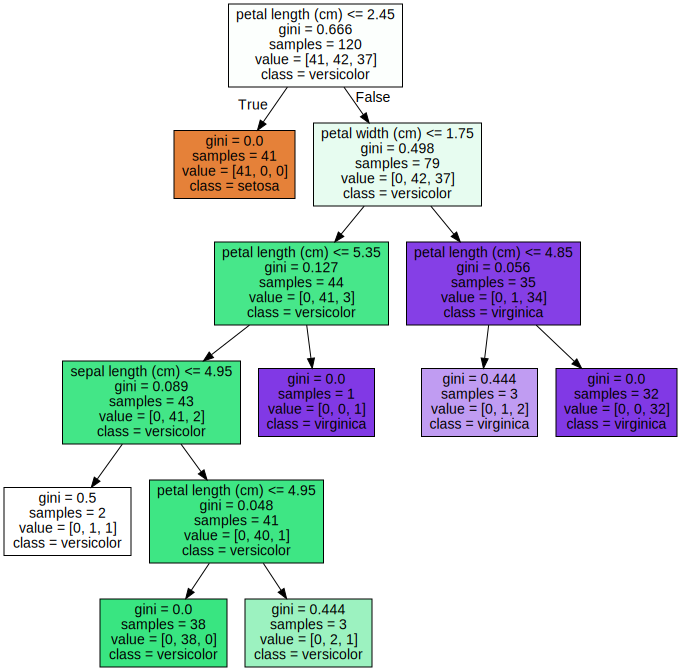

In [13]:
dtc3 = DecisionTreeClassifier(min_samples_split=4, random_state=156)
dtc3.fit(X_train, y_train)
export_graphviz(
    dtc3, out_file='tree3.dot',
    feature_names=iris.feature_names, class_names=iris.target_names,
    impurity=True, filled=True
)
with open('tree3.dot') as file:
    dot_graph = file.read()
graphviz.Source(dot_graph)

- min_samples_leaf

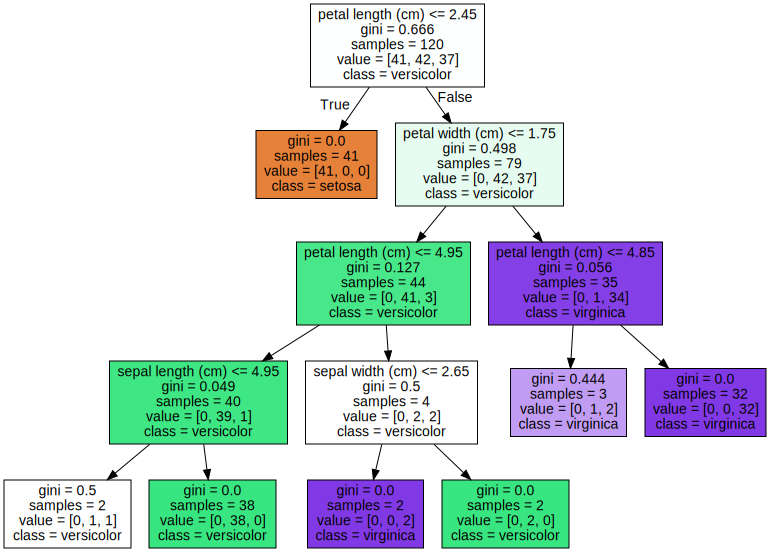

In [14]:
dtc4 = DecisionTreeClassifier(min_samples_leaf=2, random_state=156)
dtc4.fit(X_train, y_train)
export_graphviz(
    dtc4, out_file='tree4.dot',
    feature_names=iris.feature_names, class_names=iris.target_names,
    impurity=True, filled=True
)
with open('tree4.dot') as file:
    dot_graph = file.read()
graphviz.Source(dot_graph)

- 모델 비교

In [15]:
dtc.score(X_test, y_test), dtc2.score(X_test, y_test), dtc3.score(X_test, y_test), dtc4.score(X_test, y_test)

(1.0, 0.9666666666666667, 0.9666666666666667, 0.9333333333333333)

#### 학습된 모델이 제공하는 정보
- Feature importance

In [16]:
dtc.feature_importances_

array([0.02920926, 0.        , 0.04178217, 0.92900857])

In [17]:
dtc2.feature_importances_

array([0.        , 0.        , 0.03193211, 0.96806789])

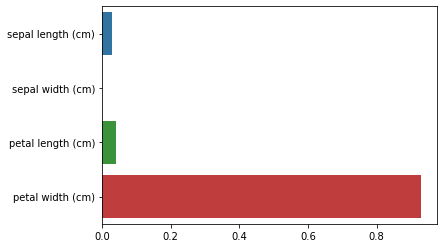

In [18]:
import seaborn as sns
sns.barplot(x=dtc.feature_importances_,y=iris.feature_names)
plt.show()